In [2]:
import arepo_run as arun
import matplotlib.pylab as plt
import numpy as np
import gadget
# import yt
# import cmasher

#Some constants
gamma    = 5./3
unit_m   = 1.989e43
unit_v   = 1.e5
unit_l   = 3.09567758e21
unit_t   = unit_l/unit_v
unit_rho = unit_m/unit_l**3




In [ ]:
#Snapshot
num  = 0
#Read
o  = arun.Run(snappath='/cosma8/data/dp317/dc-naza3/gasCloudNfw/output', snapbase="snap_")
s  = o.loadSnap(snapnum=num)

In [ ]:
s.data.keys()

dict_keys(['flga', 'wind', 'pos', 'rho', 'grar', 'u', 'mass', 'id', 'pres', 'vel', 'vol', 'vort', 'type'])

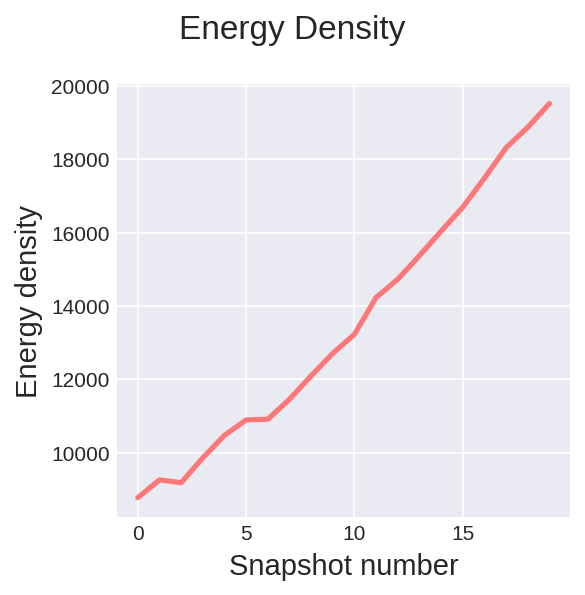

In [ ]:


# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/cosma8/data/dp317/dc-naza3/gasCloudNfw/output', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
numsnaps = 20
U = []
for i in range(numsnaps):
    s  = o.loadSnap(snapnum=i)
    U.append(s.u.mean())

U = np.array(U)
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Plot lines
ax.plot(range(numsnaps), U, linewidth=2.5, color='#FF6B6B', alpha=0.9)
plt.ylabel(r'Energy density', fontsize=14)
plt.xlabel(r'Snapshot number', fontsize=14)
fig.suptitle('Energy Density', fontsize=16)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3744541/981212988.py:46: RuntimeWarning: Mean of empty slice.
  val_binned = np.array([s.data[val][bin_indices == i].mean()
/cosma/apps/dp317/dc-naza3/renv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3744541/981212988.py:60: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(r_plot)[mask], np.log10(val_plot)[mask], alpha=0.9, label=f'Snap {i}')
/tmp/ipykernel_3744541/981212988.py:60: RuntimeWarning: invalid value encountered in log10
  ax.plot(np.log10(r_plot)[mask], np.log10(val_plot)[mask], alpha=0.9, label=f'Snap {i}')


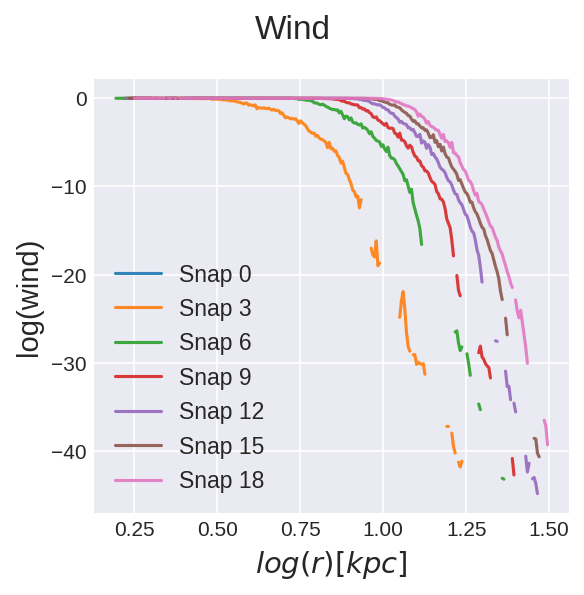

In [11]:
def rvsval(value='rho', snappath='', num=0, nbins=100):
    
    #Read
    o  = arun.Run(snappath=snappath, snapbase="snap_")
    s  = o.loadSnap(snapnum=num)

    gamma = 5./3
    unit_v = 1e5

    # ---- derived quantities ----
    if value == 'temp':
        kB = 1.381e-16
        mP = 1.66e-24
        xH = 0.76
        meanMolecularWeight = 0.6*mP #4*mP / (1 + 3*xH + 4*xH * s.data['ne'])
        s.data['temp'] = (gamma - 1) * meanMolecularWeight / kB * s.data['u'] * unit_v**2

    if value == 'speed':
        s.data['speed'] = np.linalg.norm(s.data['vel'], axis=1)

    if value == 'vortmag':
        s.data['vortmag'] = np.linalg.norm(s.data['vortmag'], axis=1)

    if value == 'grar_rho':
        s.data['grar_rho'] = np.linalg.norm(s.data['grar'], axis=1) / s.data['rho']
    
    if value == 'energdens':
        s.data['energdens'] = s.data['u']*s.data['rho']

    #Centre of Box
    xc = 500.
    yc = 500.
    zc = 500.

    xx    = s.data['pos'][:,0] - xc
    yy    = s.data['pos'][:,1] - yc
    zz    = s.data['pos'][:,2] - zc
    rr = np.sqrt(xx*xx + yy*yy + zz*zz)

    # Create radial bins and compute average value in each bin
    r_bins = np.logspace(np.log10(rr.min()), np.log10(rr.max()), nbins)
    r_centers = 0.5 * (r_bins[:-1] + r_bins[1:])
    
    # Bin the data and compute mean
    bin_indices = np.digitize(rr, r_bins)
    val_binned = np.array([s.data[val][bin_indices == i].mean() 
                           for i in range(1, len(r_bins))])
    
    return r_centers, val_binned

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

val = 'wind'
snappath = '/cosma8/data/dp317/dc-naza3/gasCloudNfw/output'
# Plot lines for all snapshots  
for i in range(0,20, 3):
    r_plot, val_plot = rvsval(value=val, snappath=snappath, num=i, nbins=1000)
    mask = (np.log10(r_plot)>0.1) & (np.log10(r_plot)<1.5) #np.ones_like(r_plot, dtype=bool) #
    ax.plot(np.log10(r_plot)[mask], np.log10(val_plot)[mask], alpha=0.9, label=f'Snap {i}')


# Find normalization so the comparison curves land in same y-range as data
# rho0 = rho_plot10[0]

# rho_prof = rho_nfw(r_plot10, r_s, delta_c, rho_c_10Msun_per_kpc3)
# ax.plot(np.log10(r_plot10), np.log10((1-0.844)*rho_prof), '--', color='k', label=r'$\rho$ nfw', alpha=0.7)

# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-1), '--', color='dodgerblue', label=r'$\rho \propto r^{-1}$', alpha=0.7)
# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-2), '--', color='forestgreen', label=r'$\rho \propto r^{-2}$', alpha=0.7)
# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-3), '--', color='orange', label=r'$\rho \propto r^{-3}$', alpha=0.7)
# plt.axvline(np.log10(kpc_rs), linestyle='--', linewidth=0.5, color='red')
current = plt.xticks()[0]  
# plt.xticks(list(current)+[np.log10(kpc_rs)])

plt.xlabel(r'$log(r) [kpc]$', fontsize=14)
plt.ylabel('log(' + val + ')', fontsize=14)
fig.suptitle(val.capitalize(), fontsize=16)

ax.legend(fontsize=11)

plt.tight_layout()
plt.show()


/tmp/ipykernel_3744541/1847966230.py:46: RuntimeWarning: Mean of empty slice.
  val_binned = np.array([s.data[val][bin_indices == i].mean()
/cosma/apps/dp317/dc-naza3/renv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

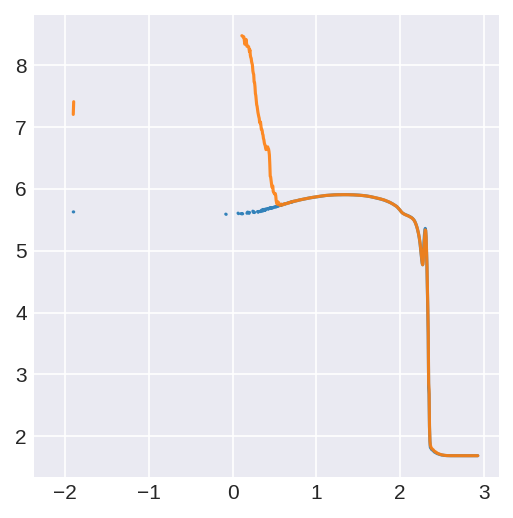

In [3]:
def rvsval(value='rho', snappath='', num=0, nbins=100):
    
    #Read
    o  = arun.Run(snappath=snappath, snapbase="snap_")
    s  = o.loadSnap(snapnum=num)

    gamma = 5./3
    unit_v = 1e5

    # ---- derived quantities ----
    if value == 'temp':
        kB = 1.381e-16
        mP = 1.66e-24
        xH = 0.76
        meanMolecularWeight = 0.6*mP #4*mP / (1 + 3*xH + 4*xH * s.data['ne'])
        s.data['temp'] = (gamma - 1) * meanMolecularWeight / kB * s.data['u'] * unit_v**2

    if value == 'speed':
        s.data['speed'] = np.linalg.norm(s.data['vel'], axis=1)

    if value == 'vortmag':
        s.data['vortmag'] = np.linalg.norm(s.data['vortmag'], axis=1)

    if value == 'grar_rho':
        s.data['grar_rho'] = np.linalg.norm(s.data['grar'], axis=1) / s.data['rho']
    
    if value == 'energdens':
        s.data['energdens'] = s.data['u']*s.data['rho']

    #Centre of Box
    xc = 500.
    yc = 500.
    zc = 500.

    xx    = s.data['pos'][:,0] - xc
    yy    = s.data['pos'][:,1] - yc
    zz    = s.data['pos'][:,2] - zc
    rr = np.sqrt(xx*xx + yy*yy + zz*zz)

    # Create radial bins and compute average value in each bin
    r_bins = np.logspace(np.log10(rr.min()), np.log10(rr.max()), nbins)
    r_centers = 0.5 * (r_bins[:-1] + r_bins[1:])
    
    # Bin the data and compute mean
    bin_indices = np.digitize(rr, r_bins)
    val_binned = np.array([s.data[val][bin_indices == i].mean() 
                           for i in range(1, len(r_bins))])
    
    return r_centers, val_binned

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

val = 'temp'
snappath = '/cosma8/data/dp317/dc-naza3/gasCloudNfw/output_refined'
# Plot lines for all snapshots  
for i in range(0,5, 1):
    r_plot, val_plot = rvsval(value=val, snappath=snappath, num=i, nbins=1000)
    mask = np.ones_like(r_plot, dtype=bool) #np.log10(r_plot)>0.5) & (np.log10(r_plot)<1.5)
    ax.plot(np.log10(r_plot)[mask], np.log10(val_plot)[mask], alpha=0.9, label=f'Snap {i}')


# Find normalization so the comparison curves land in same y-range as data
# rho0 = rho_plot10[0]

# rho_prof = rho_nfw(r_plot10, r_s, delta_c, rho_c_10Msun_per_kpc3)
# ax.plot(np.log10(r_plot10), np.log10((1-0.844)*rho_prof), '--', color='k', label=r'$\rho$ nfw', alpha=0.7)

# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-1), '--', color='dodgerblue', label=r'$\rho \propto r^{-1}$', alpha=0.7)
# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-2), '--', color='forestgreen', label=r'$\rho \propto r^{-2}$', alpha=0.7)
# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-3), '--', color='orange', label=r'$\rho \propto r^{-3}$', alpha=0.7)
# plt.axvline(np.log10(kpc_rs), linestyle='--', linewidth=0.5, color='red')
current = plt.xticks()[0]  
# plt.xticks(list(current)+[np.log10(kpc_rs)])

plt.xlabel(r'$log(r) [kpc]$', fontsize=14)
plt.ylabel('log(' + val + ')', fontsize=14)
fig.suptitle(val.capitalize(), fontsize=16)

ax.legend(fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
np.log(rr.max())

NameError: name 'rr' is not defined

/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))

Text(0.5, 0.98, 'Density')

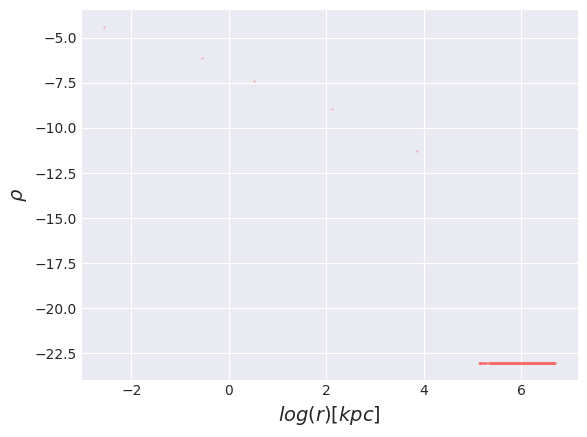

In [ ]:
#estimating the scale radius where its an isothermal sphere r^-2

rho_plot = s.rho[np.argsort(rr)]
r_plot = rr[np.argsort(rr)]
exponent = np.gradient(np.log(s.rho[np.argsort(rr)]),np.log(rr[np.argsort(rr)]))
tol=1
mask= ((exponent>2-tol) & (exponent<2+tol))
plt.scatter(np.log(r_plot[mask]), np.log(rho_plot[mask]), s=0.1, color='#FF6B6B', label=r'$\rho$ arepo', alpha=0.9)
rr[mask].mean()
plt.xlabel(r'$log(r) [kpc]$', fontsize=14)
plt.ylabel(r'$\rho$', fontsize=14)
fig.suptitle('Density', fontsize=16)
